In [1]:
from src.data import character_data
from src.util import characters, id_from_char, char_from_id, display_progress
from src.base_model import base_model
from tensorflow import keras
import numpy as np

# The Characters

In [2]:
for character in characters:
    print(character)

CAPTAIN_FALCON
DONKEY_KONG
FOX
GAME_AND_WATCH
KIRBY
BOWSER
LINK
LUIGI
MARIO
MARTH
MEWTWO
NESS
PEACH
PIKACHU
ICE_CLIMBERS
JIGGLYPUFF
SAMUS
YOSHI
ZELDA
SHEIK
FALCO
YOUNG_LINK
DR_MARIO
ROY
PICHU
GANONDORF


# The Model

In [3]:
# # For loading existing models
# model = keras.models.load_model('models/SSBML-Base-Model')

In [44]:
# for creating a new model
model = base_model()

In [67]:
model.summary()

Model: "SSBML-Base-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvCell-1 (Sequential)      (None, None, 150)         59250     
_________________________________________________________________
ConvCell-2 (Sequential)      (None, None, 256)         577280    
_________________________________________________________________
ConvCell-3 (Sequential)      (None, None, 512)         1968640   
_________________________________________________________________
ConvCell-4 (Sequential)      (None, None, 512)         3932672   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 512)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
DenseCell-1 (Sequential)     (None, 128)          

# Testing

In [191]:
data_test = character_data(
    input_directory='data/character/test',
    batch_size = 100,
    repeat=True,
)

In [227]:
score = model.evaluate(data_test, verbose=1, steps=1000)

print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100, 1)}%') 

1000/1000 [==============================] - 144s 144ms/step - loss: 0.0281 - accuracy: 0.9666 - top 8 accuracy: 0.9963

Test score: 0.028
Test accuracy: 97%
Test top 8 accuracy: 99.6%


# Confusion Matrix

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [194]:
def get_conf_matrix(labels_as_id, predictions_as_id):
    conf_matrix = np.zeros((26,26))
    for i_real, i_pred in zip(labels_as_id, predictions_as_id):
        conf_matrix[i_real, i_pred] += 1
    return conf_matrix

In [195]:
num_batches = 100
batch_size = 1000
data_conf = character_data(
    input_directory = 'data/character/test',
    batch_size = batch_size,
    repeat = False,
    num_batches = num_batches,
    onehot = False,
)

In [196]:
batch_preds = []
batch_labels = []
N = num_batches * batch_size
i = 0

for xi, yi in data_conf:
    batch_preds.append(np.argmax(model.predict(xi), axis=1))
    batch_labels.append(yi)
    
    i+=1
    display_progress(i, num_batches)
display_progress(num_batches, num_batches)

pred = np.concatenate(batch_preds)
labels = np.concatenate(batch_labels)

conf_matrix = get_conf_matrix(labels, pred)
conf_df = pd.DataFrame(conf_matrix, index=characters, columns=characters)

[####################] 100 of 100 - 100.0% 

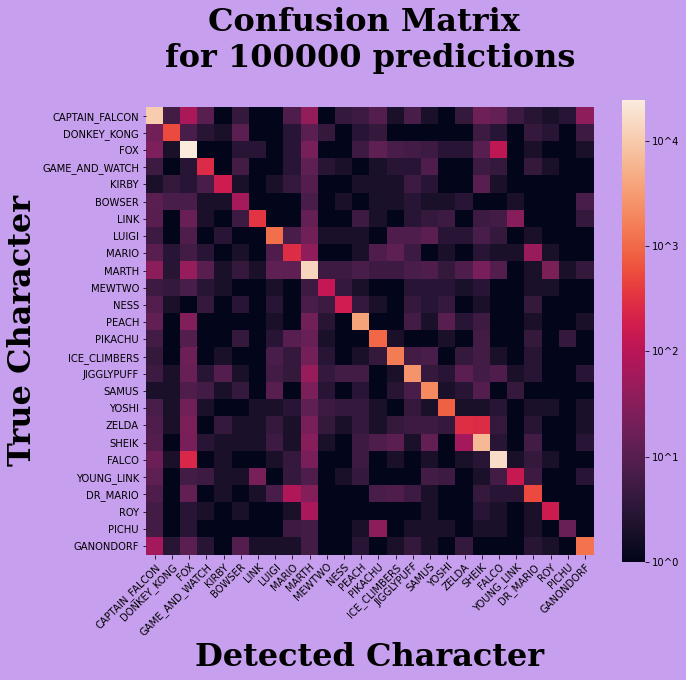

In [230]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('xkcd:lavender')

# create heatmap
ax = sn.heatmap(np.log10(1 + conf_df), annot=False, square=True, cbar=True, cbar_kws={'shrink':.8})

# format title/axis lables
fontdict = {'size': 32, 'family': 'serif', 'weight': 'semibold'}
plt.title(f'Confusion Matrix \nfor {N} predictions', pad=40, loc='center', fontdict=fontdict)
plt.ylabel('True Character', fontdict=fontdict)
plt.xlabel('Detected Character', fontdict=fontdict)
for tick in ax.get_xticklabels():
    tick.set_horizontalalignment('right')
    tick.set_rotation_mode('anchor')
    tick.set_rotation(45)

# format colorbar
cbar = ax.collections[0].colorbar
cbar_ticks = [0, 1, 2, 3, 4]
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([f'10^{tick}' for tick in cbar_ticks])

plt.tight_layout()

# save figure and show
fig.savefig('images/SSBML-Base-Model.png')
plt.show()

# Training

In [46]:
# Define Data generation
data_train = character_data(
    input_directory='data/character/train',
    batch_size = 32,
    repeat=True
)

In [47]:
# Training Loop
model.fit(
    data_train,
    epochs=40,
    steps_per_epoch=2048,
    verbose=1
)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/40
2048/2048 [==============================] - 473s 231ms/step - loss: 0.2290 - accuracy: 0.6994 - top 8 accuracy: 0.9624
Epoch 2/40
2048/2048 [==============================] - 474s 232ms/step - loss: 0.1123 - accuracy: 0.8513 - top 8 accuracy: 0.9771
Epoch 3/40
2048/2048 [==============================] - 474s 231ms/step - loss: 0.0848 - accuracy: 0.8881 - top 8 accuracy: 0.9851
Epoch 4/40
2048/2048 [==============================] - 474s 231ms/step - loss: 0.0734 - accuracy: 0.9017 - top 8 accuracy: 0.9867
Epoch 5/40
2048/2048 [==============================] - 473s 231ms/step - loss: 0.0690 - accuracy: 0.9085 - top 8 accuracy: 0.9873
Epoch 6/40
2048/2048 [==============================] - 474s 232ms/step - loss: 0.0633 - accuracy: 0.9147 - top 8 accuracy: 0.9886
Epoch 7/40
2048/2048 [==============================] - 474s 231ms/step - loss: 0.0593 - accuracy: 0.9196 - top 8 accuracy: 0.9893
Epoch 8/40
2048/2048 [==============================] - 475s 232ms/step - loss: 0.0

In [48]:
# Define Data generation
data_train = character_data(
    input_directory='data/character/train',
    batch_size = 128,
    repeat=True,
)

In [49]:
# Training Loop
model.fit(
    data_train,
    epochs=20,
    steps_per_epoch=512,
    verbose=1,
)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/20
512/512 [==============================] - 508s 993ms/step - loss: 0.0245 - accuracy: 0.9657 - top 8 accuracy: 0.9956
Epoch 2/20
512/512 [==============================] - 503s 983ms/step - loss: 0.0228 - accuracy: 0.9678 - top 8 accuracy: 0.9958
Epoch 3/20
512/512 [==============================] - 502s 981ms/step - loss: 0.0225 - accuracy: 0.9689 - top 8 accuracy: 0.9961
Epoch 4/20
512/512 [==============================] - 501s 978ms/step - loss: 0.0231 - accuracy: 0.9680 - top 8 accuracy: 0.9962
Epoch 5/20
512/512 [==============================] - 502s 980ms/step - loss: 0.0216 - accuracy: 0.9692 - top 8 accuracy: 0.9961
Epoch 6/20
512/512 [==============================] - 501s 979ms/step - loss: 0.0227 - accuracy: 0.9689 - top 8 accuracy: 0.9963
Epoch 7/20
512/512 [==============================] - 502s 981ms/step - loss: 0.0213 - accuracy: 0.9698 - top 8 accuracy: 0.9962
Epoch 8/20
512/512 [==============================] - 503s 982ms/step - loss: 0.0228 - accuracy: 

In [50]:
# Define Data generation
data_train = character_data(
    input_directory='data/character/train',
    batch_size = 512,
    repeat=True,
)

In [51]:
# Training Loop
model.fit(
    data_train,
    epochs=10,
    steps_per_epoch=128,
    verbose=1,
)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/10
128/128 [==============================] - 522s 4s/step - loss: 0.0150 - accuracy: 0.9786 - top 8 accuracy: 0.9973
Epoch 2/10
128/128 [==============================] - 520s 4s/step - loss: 0.0149 - accuracy: 0.9790 - top 8 accuracy: 0.9972
Epoch 3/10
128/128 [==============================] - 519s 4s/step - loss: 0.0147 - accuracy: 0.9788 - top 8 accuracy: 0.9973
Epoch 4/10
128/128 [==============================] - 518s 4s/step - loss: 0.0152 - accuracy: 0.9787 - top 8 accuracy: 0.9973
Epoch 5/10
128/128 [==============================] - 517s 4s/step - loss: 0.0149 - accuracy: 0.9781 - top 8 accuracy: 0.9972
Epoch 6/10
128/128 [==============================] - 517s 4s/step - loss: 0.0148 - accuracy: 0.9793 - top 8 accuracy: 0.9975
Epoch 7/10
128/128 [==============================] - 517s 4s/step - loss: 0.0142 - accuracy: 0.9796 - top 8 accuracy: 0.9977
Epoch 8/10
128/128 [==============================] - 517s 4s/step - loss: 0.0148 - accuracy: 0.9791 - top 8 accuracy:

In [52]:
# Define Data generation
data_train = character_data(
    input_directory='data/character/train',
    batch_size = 2048,
    repeat=True,
)

In [53]:
# Training Loop
model.fit(
    data_train,
    epochs=5,
    steps_per_epoch=32,
    verbose=1,
)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/5
32/32 [==============================] - 516s 16s/step - loss: 0.0123 - accuracy: 0.9824 - top 8 accuracy: 0.9976
Epoch 2/5
32/32 [==============================] - 513s 16s/step - loss: 0.0123 - accuracy: 0.9819 - top 8 accuracy: 0.9974
Epoch 3/5
32/32 [==============================] - 515s 16s/step - loss: 0.0120 - accuracy: 0.9824 - top 8 accuracy: 0.9977
Epoch 4/5
32/32 [==============================] - 513s 16s/step - loss: 0.0119 - accuracy: 0.9825 - top 8 accuracy: 0.9979
Epoch 5/5
32/32 [==============================] - 515s 16s/step - loss: 0.0120 - accuracy: 0.9830 - top 8 accuracy: 0.9978

Test score: 0.03
Test accuracy: 97%
Test top 8 accuracy: 100%


In [54]:
score = model.evaluate(data_test, steps=500, verbose=1)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

500/500 [==============================] - 70s 140ms/step - loss: 0.0280 - accuracy: 0.9669 - top 8 accuracy: 0.9964

Test score: 0.028
Test accuracy: 97%
Test top 8 accuracy: 100%


## Don't forget to save!

In [55]:
model.save('models/SSBML-Base-Model')

# Fine Tuning

In [ ]:
# increase focus of focal loss to
# increase accuracy on minority classes
from src.base_model import top_8_accuracy
import tensorflow_addons as tfa
loss = tfa.losses.SigmoidFocalCrossEntropy(
    alpha = 2.5,
    gamma = 2.5,
)
# reduce learning rate
optimizer = keras.optimizers.Adam(
    learning_rate = .0005,
)
# compile
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy', top_8_accuracy]
)

In [ ]:
# Define Data generation
data_train = character_data(
    input_directory='data/character/train',
    batch_size = 128,
    repeat=True,
)

In [ ]:
# Training Loop
model.fit(
    data_train,
    epochs=1,
    steps_per_epoch=512,
    verbose=1,
)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

In [ ]:
# Training Loop
model.fit(
    data_train,
    epochs=1,
    steps_per_epoch=512,
    verbose=1,
)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

In [ ]:
score = model.evaluate(data_test, steps=500, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test top 8 accuracy: {round(score[2]*100)}%')

In [ ]:
model.save('models/SSBML-Base-Model')